In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display, HTML

import pydot

In [2]:
df = pd.read_csv(r".\Datasets(Lab2)\github-organizations.csv",
                 delimiter=",",
                 encoding='utf-8')

df["member"].replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
 

In [3]:
df.head(10)

,Organisation,member
0,ethereum,Oleh Aldekein
1,ethereum,None
2,ethereum,Frank Szendzielarz
3,ethereum,Kolby Moroz Liebl
4,ethereum,Marius van der Wijden
5,ethereum,Mihai Alisie
6,ethereum,None
7,ethereum,Anton Nashatyrev
8,ethereum,Justin Martin
9,ethereum,RJ Catalano


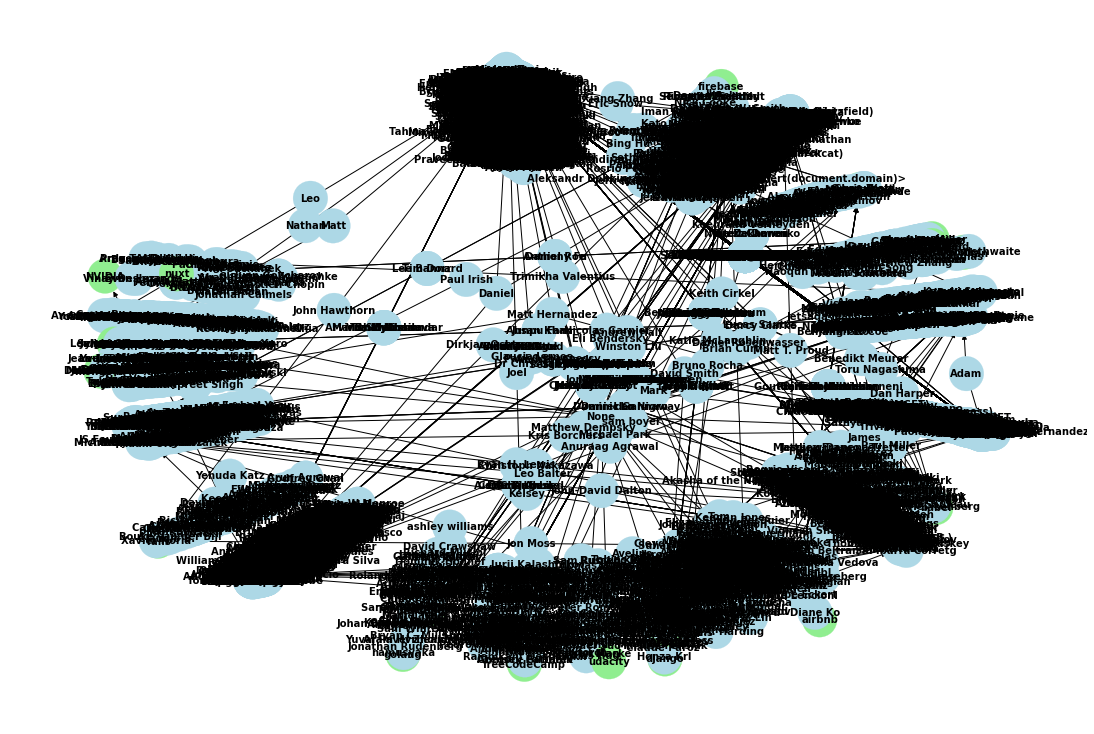

In [4]:
G = nx.from_pandas_edgelist(df, source='member', target='Organisation',
                            create_using=nx.DiGraph)
colors = []
for node in G:
    if node in df["member"].values:
        colors.append("lightblue")
    else:
        colors.append("lightgreen")

plt.figure(figsize=(15, 10))
# <Figure size 1500x1000 with 0 Axes>

nx.draw(G,
        node_size=1200, node_color=colors, linewidths=0.25, font_size=10,
        font_weight='bold', with_labels=True)

In [5]:
nx.to_pandas_adjacency(G)

,Oleh Aldekein,ethereum,None,Frank Szendzielarz,Kolby Moroz Liebl,Marius van der Wijden,Mihai Alisie,Anton Nashatyrev,Justin Martin,RJ Catalano,...,Like Zhu,Ovidiu Dan,Moony Chou,Stephanie Visser,Zoe Xi,Chris Colborne,Zachary Danz,zsy,Zuhair Parvez,Yiwen Zhu
Oleh Aldekein,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ethereum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
None,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Frank Szendzielarz,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kolby Moroz Liebl,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chris Colborne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zachary Danz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zsy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zuhair Parvez,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
distance = nx.spring_layout(G)
In = nx.closeness_centrality(G) 
bc = nx.betweenness_centrality(G, normalized = True, endpoints = False)
clustering = nx.clustering(G)

Degree - reiškia kiek sujungimų mazgas turi. Šiuo atvėju organizacijos turi daug sujungtu mazgu, o žmones turi tik po keleta.

Distance matrix - reiškia x,y ašis erdvėje. 

Closeness - reiškia kiek arti mazgas yar kitų mazgų. Šiuo atvėju dauguma mazgų yra nutole vieni nuo kitų.

Betweennsess - reiškia kiek dažnai mazgas pasitaiko tarp kitų mazgų. Šiuo atvėju kiti mazgai kart mazgų nepasitaiko.

Clustering - tai yar mazgu pasiskirstymas. Šiuo atvėju mazgai nera pasiskirstė pagal klase,

In [16]:
pd.DataFrame(dict(
    DEGREE = dict(G.degree),
    DISTANCE_MATRIX = distance,
    CLOSENESS = In,
    BETWEENNESS = bc,
    CLUSTERING = clustering
    
))

,DEGREE,DISTANCE_MATRIX,CLOSENESS,BETWEENNESS,CLUSTERING
Oleh Aldekein,1,"[0.5900156497955322, 0.5970743298530579]",0.000000,0.0,0
ethereum,74,"[0.6196658611297607, 0.6252777576446533]",0.008318,0.0,0
None,27,"[-0.1703222393989563, 0.3537733554840088]",0.000000,0.0,0
Frank Szendzielarz,1,"[0.5447237491607666, 0.5536689162254333]",0.000000,0.0,0
Kolby Moroz Liebl,1,"[0.5121976733207703, 0.5263175368309021]",0.000000,0.0,0
...,...,...,...,...,...
Chris Colborne,1,"[0.6594937443733215, -0.3795267939567566]",0.000000,0.0,0
Zachary Danz,1,"[0.5572762489318848, -0.3270454704761505]",0.000000,0.0,0
zsy,1,"[0.4669290781021118, -0.2750217616558075]",0.000000,0.0,0
Zuhair Parvez,1,"[0.46862173080444336, -0.28027352690696716]",0.000000,0.0,0


In [20]:
diameter = nx.diameter(G.to_undirected())
print(diameter)

NetworkXError: Found infinite path length because the graph is not connected

# Ši klaida yra nes tinklas nera stipriai sujungtas, ne visi mazgai yra sujungti

In [25]:
centralization = nx.closeness_centrality(G, u=None, distance=None, wf_improved=False)

pd.DataFrame(dict(
    Centralization = centralization
))

,Centralization
,0.0
(Andrey Listochkin),0.0
(Alan Song),0.0
Bai Yang,0.0
SionYang,0.0
...,...
zhihaoguo,0.0
zhoufenqin,0.0
zng y,0.0
zsy,0.0


Centralization -reiškia kiek tinklas yra centruotas į vieną mazgą. Šiuo atvėju dauguma nėra centruoti

In [26]:
clustering_coefficient = nx.average_clustering(G)
print (clustering_coefficient)

0.0


clustering_coefficient - reikškia kiek mazgus galima klasifikuoti. Šiuo atvėju nera klasifikuojama